In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import subprocess

def run_command(cmd):
    print(cmd)
    os.system(cmd)

## References

- [LDSC inputs](https://uwmadison.app.box.com/s/u5yqtacw7sev1aj97cxi1iyw9wrgk34v)
- [LDSC updated for python3](https://github.com/svdorn/ldsc-2.0.1/)
- [Summary stats](https://uwmadison.app.box.com/s/44p6bpb02mcg2pjcoiivc5l6vjr6z3k6)

In [2]:
hw4_path = "../Homework/hw4"

# Environment
python_exe = f"{hw4_path}/ldsc-2.0.1_venv/bin/python"

# Reference data
snp_list_path = f"{hw4_path}/ldsc_inputs/w_hm3.snplist"
reference_ld_path = f"{hw4_path}/ldsc_inputs/for_h2/eur_w_ld_chr/"
enrichment_ld_baseline_path = (
    f"{hw4_path}/ldsc_inputs/for_enrichment/Baseline/baseline."
)
enrichment_ld_geno_path = (
    f"{hw4_path}/ldsc_inputs/for_enrichment/GenoSkylinePlus/GSplus_Tier3_1KGphase3."
)
enrichment_weights_path = (
    f"{hw4_path}/ldsc_inputs/for_enrichment/weights/weights.hm3_noMHC."
)
enrichment_freq_path = f"{hw4_path}/ldsc_inputs/for_enrichment/genotype/1000G.EUR.QC."

# Scripts
reformat_sumstats_script = f"{hw4_path}/ldsc-2.0.1/munge_sumstats.py"
ldsc_script = f"{hw4_path}/ldsc-2.0.1/ldsc.py"

# Paths
sumstats_folder = f"data/sumstats"
formatted_sumstats_folder = f"data/formatted_sumstats"
heritability_results_folder = f"data/heritability_results"
enrichment_results_folder = f"data/enrichment_results"
genetic_correlation_results_folder = f"data/genetic_correlation_results"
os.makedirs(formatted_sumstats_folder, exist_ok=True)
os.makedirs(heritability_results_folder, exist_ok=True)
os.makedirs(enrichment_results_folder, exist_ok=True)
os.makedirs(genetic_correlation_results_folder, exist_ok=True)

# For enrichment plots
tissue_headers = [
    "Mononuclear cells from peripheral blood",
    "T cells CD3+",
    "T cells effector/memory CD4+ CD25int CD127+",
    "T regulatory cells CD4+ CD25+ CD127-",
    "T helper cells CD4+ CD25-",
    "T helper naive cells CD4+ CD25- CD45RA+",
    "T helper cells PMA-I stimulated CD4+ CD25- IL17-",
    "T helper 17 cells PMA-I stimulated CD4+ CD25- IL17+",
    "T helper memory cells CD4+ CD25- CD45RO+",
    "T helper memory cells from peripheral blood CD4+",
    "T memory cells CD8+",
    "T helper naive cells CD4+",
    "T naive cells CD8+",
    "Monocytes CD14+",
    "Hematopoietic stem cells G-CSF-mobilized CD34+",
    "B cells CD19+",
    "Natural killer cells CD56+",
    "GM12878 lymphoblastoid cells",
    "Thymus",
    "Spleen",
    "Brain hippocampus middle",
    "Brain substantia nigra",
    "Brain anterior caudate",
    "Brain cingulate gyrus",
    "Brain inferior temporal lobe",
    "Brain angular gyrus",
    "Brain dorsolateral prefrontal cortex",
    "NH-A astrocytes",
    "Lung",
    "NHLF lung fibroblast primary cells",
    "Aorta",
    "HUVEC umbilical vein endothelial primary cells",
    "Right atrium",
    "Left ventricle",
    "Right ventricle",
    "Muscle satellite cultured cells",
    "Psoas muscle",
    "Skeletal muscle",
    "HSMM skeletal muscle myoblasts cells",
    "HSMM cell derived skeletal muscle myotubes cells",
    "Stomach smooth muscle",
    "Duodenum smooth muscle",
    "Colon smooth muscle",
    "Rectal smooth muscle",
    "Esophagus",
    "Gastric",
    "Stomach mucosa",
    "Duodenum mucosa",
    "Small intestine",
    "Sigmoid colon",
    "Colonic mucosa",
    "Rectal mucosa",
    "Pancreas",
    "Pancreatic islets",
    "Liver",
    "Adipose nuclei",
    "Adipose derived mesenchymal stem cell cultured cells",
    "Mesenchymal stem cell derived adipocyte cultured cells",
    "Mesenchymal stem cell derived chondrocyte cultured cells",
    "Bone marrow derived cultured mesenchymal stem cells",
    "Osteoblast primary cells",
    "Foreskin fibroblast primary cells",
    "Foreskin melanocyte primary cells",
    "Foreskin keratinocyte primary cells",
    "NHDF-Ad adult dermal fibroblast primary cells",
    "NHEK-epidermal keratinocyteprimary cells",
    "Breast myoepithelial primary cells",
    "Breast variant human mammary epithelial cells (vHMEC)",
    "HMEC mammary epithelial primary cells",
    "Ovary",
]
Colors_HF66 = (
    ["#FB8575"] * 18
    + ["#D17493", "#8D719B"]
    + ["#446B85"] * 8
    + ["#229E9C"] * 2
    + ["#5DCD8F"]
    + ["#CAF270"] * 3
    + ["#DAC14D"] * 5
    + ["#D79347"] * 12
    + ["#C06B4D"] * 2
    + ["#677C36"]
    + ["#177374"] * 3
    + ["#6D5271"] * 3
    + ["#6389AE"] * 2
    + ["#34C5CD"] * 3
    + ["#62FCC0"]
)

## Format data

Sporadic miscarriage had a different formatting of SNP IDs, so needed to be translated into "rs" format.

In [ ]:
# # Format according to rs notation and drop unnecessary columns
# data = pd.read_csv(f"{sumstats_folder}/sporadic_miscarriage_raw.tsv.gz", sep="\t", compression="gzip")
# display(data)
# data = data[["MarkerName", "Allele1", "Allele2", "P-value", "Effect", "StdErr"]]
# data["Allele1"] = data["Allele1"].str.upper()
# data["Allele2"] = data["Allele2"].str.upper()
# data["chr"] = data["MarkerName"].str.split(":", expand=True)[0]
# data["MarkerName"] = "rs" + data["MarkerName"].str.split(":", expand=True)[1]
# data.to_csv(
#     f"{sumstats_folder}/sporadic_miscarriage.tsv.gz",
#     sep="\t",
#     index=False,
#     header=True,
#     compression="gzip",
# )
# display(data.head())

Using munge_sumstats to format the summary stats of all the traits we consider

In [3]:
traits = [
    "age_at_first_birth",
    "cannabis_dependence",
    "chronotype",
    "income",
    "number_of_children_born",
    "ptsd",
    "sporadic_miscarriage"]

# # To examine the formats
# for trait in traits:
#     data_head = pd.read_csv(
#         f"{sumstats_folder}/{trait}.tsv.gz",
#         sep=r"\s+",
#         compression="gzip",
#         nrows=5,
#     )
#     print(trait)
#     display(data_head)

formatting_inputs = {
    "age_at_first_birth": {
        "data_type": "continuous",
        "sample_size": 542_901,
        "snp": "variant_id",
        "a1": "effect_allele",
        "a2": "other_allele",
        "p": "p_value",
    },
    "cannabis_dependence": {
        "data_type": "binary",
        "num_cases": 17_968,
        "num_controls": 357_219,
        "snp": "SNP",
        "a1": "A1",
        "a2": "A2",
        "p": "P",
    },
    "chronotype": {
        "data_type": "continuous",
        "sample_size": 449_734,
        "snp": "SNP",
        "a1": "ALLELE1",
        "a2": "ALLELE0",
        "p": "P_BOLT_LMM",
    },
    "income": {
        "data_type": "continuous",
        "sample_size": 286_301,
        "snp": "SNP",
        "a1": "Effect_allele",
        "a2": "Non_effect_Allele",
        "p": "P",
    },
    "number_of_children_born": {
        "data_type": "continuous",
        "sample_size": 318_463,
        "snp": "SNPID",
        "a1": "A1",
        "a2": "A2",
        "p": "Pvalue",
    },
    "ptsd": {
        "data_type": "binary",
        "num_cases": 23_212,
        "num_controls": 151_447,
        "snp": "SNP",
        "a1": "A1",
        "a2": "A2",
        "p": "P",
    },
    "sporadic_miscarriage": {
        "data_type": "binary",
        "num_cases": 499_996,
        "num_controls": 174_109,
        "snp": "rsID",
        "a1": "A1",
        "a2": "A2",
        "p": "P",
    },
}

In [4]:
def format_summary_stats_binary_trait(trait, formatting_input):
    sumstats_file = f"{sumstats_folder}/{trait}.tsv.gz"
    formatted_file = f"{formatted_sumstats_folder}/{trait}"
    log_file = f"logs/{trait}_sumstats.log"
    err_file = f"logs/{trait}_sumstats.err"

    cmd = [
        python_exe,
        reformat_sumstats_script,
        "--sumstats",
        sumstats_file,
        "--N-cas",
        str(formatting_input["num_cases"]),
        "--N-con",
        str(formatting_input["num_controls"]),
        "--snp",
        formatting_input["snp"],
        "--a1",
        formatting_input["a1"],
        "--a2",
        formatting_input["a2"],
        "--p",
        formatting_input["p"],
        "--out",
        formatted_file,
        "--merge-alleles",
        snp_list_path,
    ]

    # display(cmd)

    with open(log_file, "w") as log_file_obj:
        with open(err_file, "w") as err_file_obj:
            cmd_str = " ".join(cmd)
            subprocess.check_call(
                cmd_str, stdout=log_file_obj, stderr=err_file_obj, shell=True
            )


def format_summary_stats_continuous_trait(trait, formatting_input):
    sumstats_file = f"{sumstats_folder}/{trait}.tsv.gz"
    formatted_file = f"{formatted_sumstats_folder}/{trait}"
    log_file = f"logs/{trait}_sumstats.log"
    err_file = f"logs/{trait}_sumstats.err"

    cmd = [
        python_exe,
        reformat_sumstats_script,
        "--sumstats",
        sumstats_file,
        "--N",
        str(formatting_input["sample_size"]),
        "--snp",
        formatting_input["snp"],
        "--a1",
        formatting_input["a1"],
        "--a2",
        formatting_input["a2"],
        "--p",
        formatting_input["p"],
        "--out",
        formatted_file,
        "--merge-alleles",
        snp_list_path,
    ]

    # display(cmd)

    with open(log_file, "w") as log_file_obj:
        with open(err_file, "w") as err_file_obj:
            cmd_str = " ".join(cmd)
            subprocess.check_call(
                cmd_str, stdout=log_file_obj, stderr=err_file_obj, shell=True
            )

In [ ]:
for trait in traits:
    if trait != "sporadic_miscarriage":
        continue
    print(f"Formatting {trait} summary statistics...")
    formatting_input = formatting_inputs[trait]
    if formatting_input["data_type"] == "binary":
        format_summary_stats_binary_trait(
            trait,
            formatting_input,
        )
    elif formatting_input["data_type"] == "continuous":
        format_summary_stats_continuous_trait(
            trait,
            formatting_input,
        )
    else:
        raise ValueError(f"Unknown data type: {formatting_input['data_type']}")

## Heritability Analysis

- LDSC intercept and heritability
- Partition trait heritability by tissue annotations from HW4 and quantify h2 enrichment.

In [32]:
def estimate_heritability(trait):
    formatted_sumstats_file = f"{formatted_sumstats_folder}/{trait}"
    log_file = f"logs/{trait}_heritability.log"
    err_file = f"logs/{trait}_heritability.err"
    out_folder = f"{heritability_results_folder}/{trait}"

    cmd = [
        python_exe,
        ldsc_script,
        "--h2",
        f"{formatted_sumstats_file}.sumstats.gz",
        "--ref-ld-chr",
        reference_ld_path,
        "--w-ld-chr",
        reference_ld_path,
        "--out",
        out_folder,
    ]

    # display(cmd)

    with open(log_file, "w") as log_file_obj:
        with open(err_file, "w") as err_file_obj:
            cmd_str = " ".join(cmd)
            subprocess.check_call(
                cmd_str, stdout=log_file_obj, stderr=err_file_obj, shell=True
            )


def estimate_heritability_enrichment(trait):
    formatted_sumstats_file = f"{formatted_sumstats_folder}/{trait}"
    log_file = f"logs/{trait}_enrichment.log"
    err_file = f"logs/{trait}_enrichment.err"
    out_folder = f"{enrichment_results_folder}/{trait}"

    cmd = [
        python_exe,
        ldsc_script,
        "--h2",
        f"{formatted_sumstats_file}.sumstats.gz",
        "--ref-ld-chr",
        f"{enrichment_ld_baseline_path},{enrichment_ld_geno_path}",
        "--w-ld-chr",
        enrichment_weights_path,
        "--overlap-annot",
        "--frqfile-chr",
        enrichment_freq_path,
        "--out",
        out_folder,
    ]

    # display(cmd)

    with open(log_file, "w") as log_file_obj:
        with open(err_file, "w") as err_file_obj:
            cmd_str = " ".join(cmd)
            subprocess.check_call(
                cmd_str, stdout=log_file_obj, stderr=err_file_obj, shell=True
            )


def plot_enrichment(trait):
    enrichment_results_path = f"{enrichment_results_folder}/{trait}.results"
    plot_path = f"{enrichment_results_folder}/{trait}.png"

    enrichment_results = pd.read_csv(enrichment_results_path, sep=r'\s+', header=0)

    # Format data to plot
    tissue_headers_filtered = [
        cell for i, cell in enumerate(tissue_headers) if i not in {31, 61, 62, 63}
    ]
    plot_data = pd.DataFrame(
        {
            "Tissue": pd.Categorical(
                tissue_headers_filtered,
                categories=list(dict.fromkeys(tissue_headers_filtered)),
            ),
            "Pvalue": enrichment_results.iloc[54:120, 6].astype(float),
        }
    )
    plot_data["log_Pvalue"] = -np.log10(plot_data["Pvalue"])

    # Create plot
    plt.figure(figsize=(20, 30))
    sns.barplot(
        y="Tissue",
        x="log_Pvalue",
        data=plot_data,
        hue="Tissue",
        palette=list(Colors_HF66),
        legend=False,
    )
    plt.axvline(-np.log10(0.05 / 66), linestyle="dashed", alpha=0.5, color="black")
    plt.xlabel("-log10(p-value)")
    plt.ylabel("")
    plt.title("All", fontsize=22, fontweight="bold")
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.grid(axis="x", linestyle="--", alpha=0.6)
    plt.tight_layout()

    # Save the plot
    plt.savefig(plot_path, dpi=300)
    plt.show()
    plt.close()

### Sporadic Miscarriage heritability

- Estimated intercept: 0.9858 (std err 0.0058)
- Estimated heritability: 0.0026 (std err 0.0007)
- Enrichment analysis: Right ventrical is significant

In [9]:
trait = "sporadic_miscarriage"
estimate_heritability(trait)
estimate_heritability_enrichment(trait)

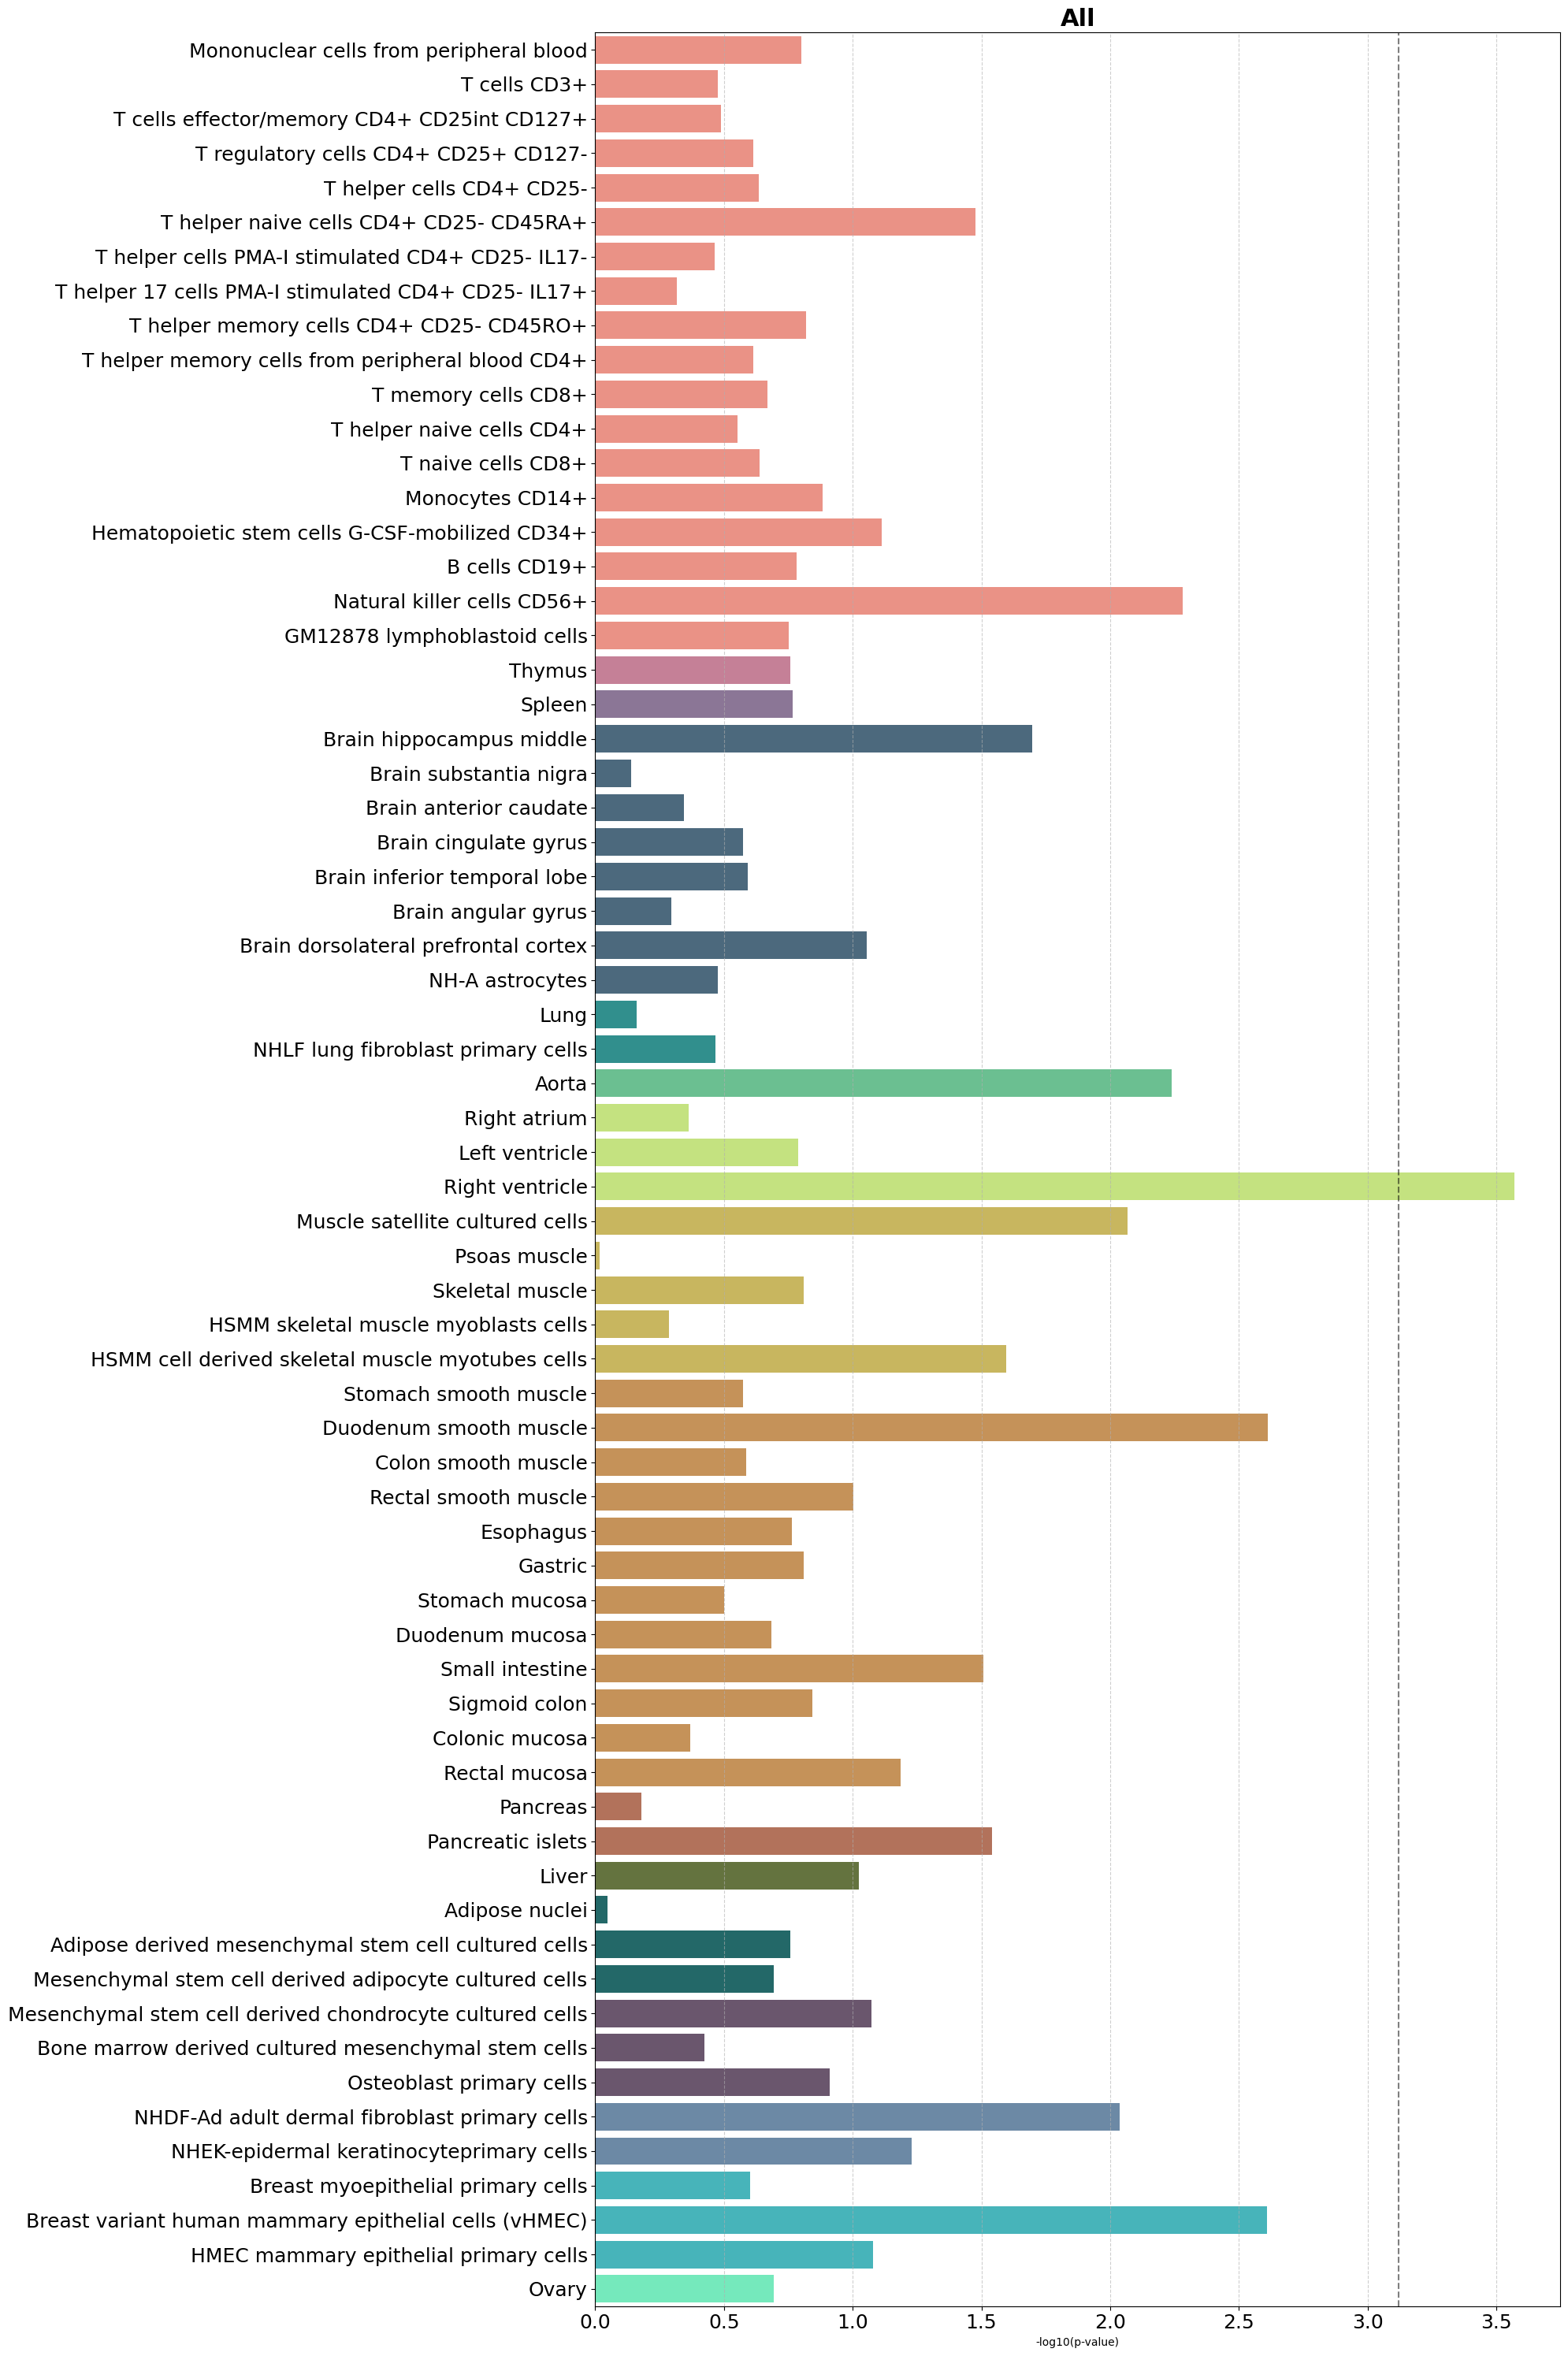

In [33]:
trait = "sporadic_miscarriage"
plot_enrichment(trait)

## Pairwise genetic correlations

In [11]:
def estimate_pairwise_genetic_correlations(trait_1, trait_2):
    formatted_sumstats_file_1 = f"{formatted_sumstats_folder}/{trait_1}.sumstats.gz"
    formatted_sumstats_file_2 = f"{formatted_sumstats_folder}/{trait_2}.sumstats.gz"
    log_file = f"logs/{trait_1}_{trait_2}_correlation.log"
    err_file = f"logs/{trait_1}_{trait_2}_correlation.err"
    out_folder = f"{genetic_correlation_results_folder}/{trait_1}_{trait_2}"

    cmd = [
        python_exe,
        ldsc_script,
        "--rg",
        f"{formatted_sumstats_file_1},{formatted_sumstats_file_2}",
        "--ref-ld-chr",
        reference_ld_path,
        "--w-ld-chr",
        reference_ld_path,
        "--out",
        out_folder,
    ]

    # display(cmd)

    with open(log_file, "w") as log_file_obj:
        with open(err_file, "w") as err_file_obj:
            cmd_str = " ".join(cmd)
            subprocess.check_call(
                cmd_str, stdout=log_file_obj, stderr=err_file_obj, shell=True
            )

In [ ]:
for trait_2 in traits:
    if trait_2 != "sporadic_miscarriage":
        print(
            f"Estimating genetic correlation between sporadic_miscarriage and {trait_2}..."
        )
        try:
            estimate_pairwise_genetic_correlations("sporadic_miscarriage", trait_2)
        except subprocess.CalledProcessError as e:
            print(f"Error estimating genetic correlation: {e}")
            continue

In [14]:
# Displaying the results, aggregated from the logs
correlation_results = [
    {
        "Trait": "age_at_first_birth",
        "Genetic Correlation": -0.4192,
        "Standard Error": 0.0802,
        "P-value": 1.742e-07,
    },
    {
        "Trait": "cannabis_dependence",
        "Genetic Correlation": 0.6629,
        "Standard Error": 0.1395,
        "P-value": 2.0225e-06,
    },
    {
        "Trait": "chronotype",
        "Genetic Correlation": -0.163,
        "Standard Error": 0.0598,
        "P-value": 0.0064,
    },
    {
        "Trait": "income",
        "Genetic Correlation": -0.1858,
        "Standard Error": 0.0719,
        "P-value": 0.0098,
    },
    {
        "Trait": "number_of_children_born",
        "Genetic Correlation": 0.6908,
        "Standard Error": 0.1214,
        "P-value": 1.2684e-08,
    },
    {
        "Trait": "ptsd",
        "Genetic Correlation": 0.5786,
        "Standard Error": 0.1671,
        "P-value": 0.0005,
    }
]

results_df = pd.DataFrame(correlation_results)

display(results_df)

,Trait,Genetic Correlation,Standard Error,P-value
0,age_at_first_birth,-0.4192,0.0802,1.742000e-07
1,cannabis_dependence,0.6629,0.1395,2.022500e-06
2,chronotype,-0.1630,0.0598,6.400000e-03
3,income,-0.1858,0.0719,9.800000e-03
4,number_of_children_born,0.6908,0.1214,1.268400e-08
5,ptsd,0.5786,0.1671,5.000000e-04


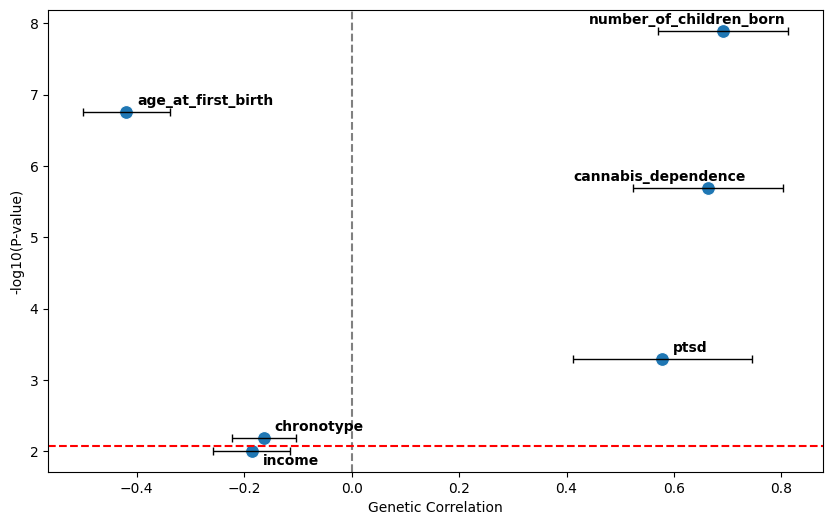

In [31]:
# Plot P-value vs genetic correlation
results_df["-log10(P-value)"] = -np.log10(results_df["P-value"])
plt.figure(figsize=(10, 6))

# Points
sns.scatterplot(
    data=results_df,
    x="Genetic Correlation",
    y="-log10(P-value)",
    s=100,
)

# Error bars
plt.errorbar(
    results_df["Genetic Correlation"],
    results_df["-log10(P-value)"],
    xerr=results_df["Standard Error"],
    fmt="none",
    ecolor="black",
    capsize=3,
    linewidth=1,
)

# Labels
for i in range(results_df.shape[0]):
    if results_df.loc[i, "Trait"] == "income":
        y_jitter = -0.2
    else:
        y_jitter = 0.1
    if results_df.loc[i, "Trait"] in ["number_of_children_born", "cannabis_dependence"]:
        x_jitter = -0.25
    else:
        x_jitter = 0.02
    plt.text(
        results_df.loc[i, "Genetic Correlation"] + x_jitter,
        results_df.loc[i, "-log10(P-value)"] + y_jitter,
        results_df.loc[i, "Trait"],
        horizontalalignment="left",
        size="medium",
        color="black",
        weight="semibold",
    )
# Line at x = 0
plt.axvline(x=0, color="gray", linestyle="--")
plt.axhline(y=-np.log10(0.05 / results_df.shape[0]), color="red", linestyle="--")
plt.show()

## Format notebook

In [34]:
run_command("jupyter nbconvert --to html LDSC_heritability_genetic_correlation.ipynb")

jupyter nbconvert --to html LDSC_heritability_genetic_correlation.ipynb


[NbConvertApp] Converting notebook LDSC_heritability_genetic_correlation.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 1073345 bytes to LDSC_heritability_genetic_correlation.html
